In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [2]:
# Q0: Setup - Import Libraries and Load Datasets
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Iris dataset for classification tasks
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Split Iris dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)

# Load California Housing dataset for regression tasks
housing = fetch_california_housing()
X_housing, y_housing = housing.data, housing.target

# Split Housing dataset
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X_housing, y_housing, test_size=0.3, random_state=42)

In [3]:
# Q1: Train Decision Tree Classifier on Iris dataset and print accuracy
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_iris, y_train_iris)
y_pred_iris = clf.predict(X_test_iris)
accuracy = accuracy_score(y_test_iris, y_pred_iris)
print(f"Q1: Decision Tree Classifier Accuracy on Iris dataset: {accuracy:.4f}")

Q1: Decision Tree Classifier Accuracy on Iris dataset: 1.0000


In [4]:
# Q2: Train Decision Tree Classifier using Gini Impurity and print feature importances
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train_iris, y_train_iris)
print("Q2: Feature Importances (Gini):")
for name, importance in zip(iris.feature_names, clf_gini.feature_importances_):
    print(f"{name}: {importance:.4f}")

Q2: Feature Importances (Gini):
sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.8933
petal width (cm): 0.0876


In [5]:
# Q3: Train Decision Tree Classifier using Entropy and print accuracy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train_iris, y_train_iris)
y_pred_entropy = clf_entropy.predict(X_test_iris)
accuracy_entropy = accuracy_score(y_test_iris, y_pred_entropy)
print(f"Q3: Accuracy with Entropy criterion: {accuracy_entropy:.4f}")

Q3: Accuracy with Entropy criterion: 0.9778


In [6]:
# Q4: Train Decision Tree Regressor on Housing dataset and evaluate MSE
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_housing, y_train_housing)
y_pred_housing = regressor.predict(X_test_housing)
mse = mean_squared_error(y_test_housing, y_pred_housing)
print(f"Q4: Decision Tree Regressor Mean Squared Error: {mse:.4f}")

Q4: Decision Tree Regressor Mean Squared Error: 0.5280


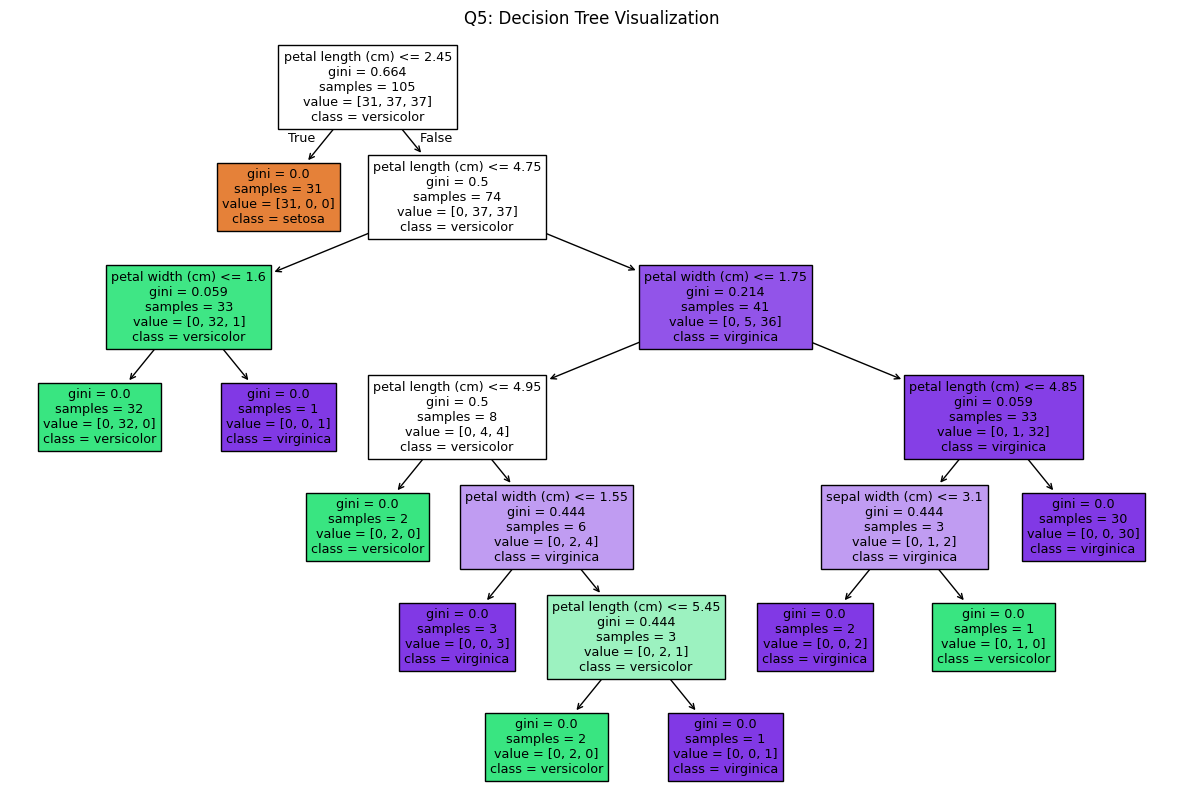

In [7]:
# Q5: Train Decision Tree Classifier and visualize the tree using plot_tree (matplotlib alternative to graphviz)
clf_vis = DecisionTreeClassifier(random_state=42)
clf_vis.fit(X_train_iris, y_train_iris)

plt.figure(figsize=(15,10))
plot_tree(clf_vis, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Q5: Decision Tree Visualization")
plt.show()

In [8]:
# Q6: Train Decision Tree Classifier with max_depth=3 and compare with full tree
clf_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_depth3.fit(X_train_iris, y_train_iris)
acc_depth3 = accuracy_score(y_test_iris, clf_depth3.predict(X_test_iris))

clf_full = DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train_iris, y_train_iris)
acc_full = accuracy_score(y_test_iris, clf_full.predict(X_test_iris))

print(f"Q6: Accuracy with max_depth=3: {acc_depth3:.4f}")
print(f"Q6: Accuracy with full depth tree: {acc_full:.4f}")

Q6: Accuracy with max_depth=3: 1.0000
Q6: Accuracy with full depth tree: 1.0000


In [9]:
# Q7: Train Decision Tree Classifier with min_samples_split=5 and compare with default
clf_min_split = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_min_split.fit(X_train_iris, y_train_iris)
acc_min_split = accuracy_score(y_test_iris, clf_min_split.predict(X_test_iris))

clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train_iris, y_train_iris)
acc_default = accuracy_score(y_test_iris, clf_default.predict(X_test_iris))

print(f"Q7: Accuracy with min_samples_split=5: {acc_min_split:.4f}")
print(f"Q7: Accuracy with default min_samples_split: {acc_default:.4f}")

Q7: Accuracy with min_samples_split=5: 1.0000
Q7: Accuracy with default min_samples_split: 1.0000


In [10]:
# Q8: Feature scaling before training Decision Tree and compare accuracy
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_iris)
X_test_scaled = scaler.transform(X_test_iris)

clf_unscaled = DecisionTreeClassifier(random_state=42)
clf_unscaled.fit(X_train_iris, y_train_iris)
acc_unscaled = accuracy_score(y_test_iris, clf_unscaled.predict(X_test_iris))

clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train_iris)
acc_scaled = accuracy_score(y_test_iris, clf_scaled.predict(X_test_scaled))

print(f"Q8: Accuracy without scaling: {acc_unscaled:.4f}")
print(f"Q8: Accuracy with scaling: {acc_scaled:.4f} (Note: Decision Trees usually don't require scaling)")

Q8: Accuracy without scaling: 1.0000
Q8: Accuracy with scaling: 1.0000 (Note: Decision Trees usually don't require scaling)


In [11]:
# Q9: Train Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_clf.fit(X_train_iris, y_train_iris)
y_pred_ovr = ovr_clf.predict(X_test_iris)
acc_ovr = accuracy_score(y_test_iris, y_pred_ovr)

print(f"Q9: Accuracy with One-vs-Rest Decision Tree: {acc_ovr:.4f}")

Q9: Accuracy with One-vs-Rest Decision Tree: 1.0000


In [12]:
# Q10: Train Decision Tree Classifier and display feature importance scores
clf_feat_imp = DecisionTreeClassifier(random_state=42)
clf_feat_imp.fit(X_train_iris, y_train_iris)
print("Q10: Feature Importance Scores:")
for name, importance in zip(iris.feature_names, clf_feat_imp.feature_importances_):
    print(f"{name}: {importance:.4f}")

Q10: Feature Importance Scores:
sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.8933
petal width (cm): 0.0876


In [13]:
# Q11: Train Decision Tree Regressor with max_depth=5 and compare with unrestricted tree
regressor_depth5 = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor_depth5.fit(X_train_housing, y_train_housing)
y_pred_depth5 = regressor_depth5.predict(X_test_housing)
mse_depth5 = mean_squared_error(y_test_housing, y_pred_depth5)

regressor_full = DecisionTreeRegressor(random_state=42)
regressor_full.fit(X_train_housing, y_train_housing)
y_pred_full = regressor_full.predict(X_test_housing)
mse_full = mean_squared_error(y_test_housing, y_pred_full)

print(f"Q11: MSE with max_depth=5: {mse_depth5:.4f}")
print(f"Q11: MSE with full depth tree: {mse_full:.4f}")

Q11: MSE with max_depth=5: 0.5211
Q11: MSE with full depth tree: 0.5280


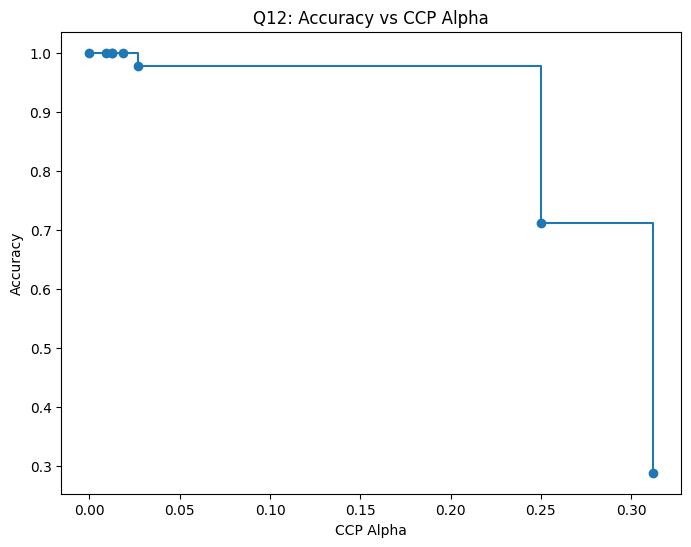

In [14]:
# Q12: Train Decision Tree Classifier with Cost Complexity Pruning and visualize effect on accuracy

clf_ccp = DecisionTreeClassifier(random_state=42)
path = clf_ccp.cost_complexity_pruning_path(X_train_iris, y_train_iris)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

acc_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train_iris, y_train_iris)
    y_pred = clf.predict(X_test_iris)
    acc_scores.append(accuracy_score(y_test_iris, y_pred))

plt.figure(figsize=(8,6))
plt.plot(ccp_alphas, acc_scores, marker='o', drawstyle="steps-post")
plt.xlabel("CCP Alpha")
plt.ylabel("Accuracy")
plt.title("Q12: Accuracy vs CCP Alpha")
plt.show()

In [15]:
# Q13: Train Decision Tree Classifier and evaluate using Precision, Recall, and F1-Score
clf_eval = DecisionTreeClassifier(random_state=42)
clf_eval.fit(X_train_iris, y_train_iris)
y_pred_eval = clf_eval.predict(X_test_iris)

precision = precision_score(y_test_iris, y_pred_eval, average='macro')
recall = recall_score(y_test_iris, y_pred_eval, average='macro')
f1 = f1_score(y_test_iris, y_pred_eval, average='macro')

print(f"Q13: Precision: {precision:.4f}")
print(f"Q13: Recall: {recall:.4f}")
print(f"Q13: F1-Score: {f1:.4f}")

Q13: Precision: 1.0000
Q13: Recall: 1.0000
Q13: F1-Score: 1.0000


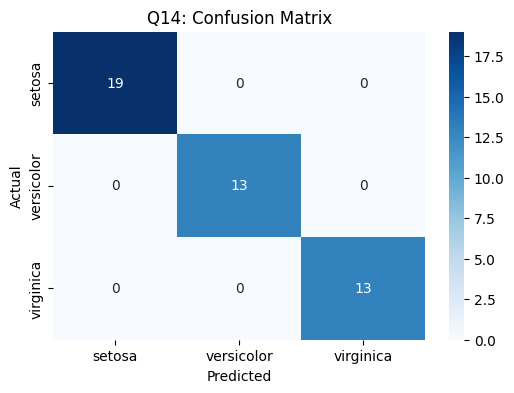

In [16]:
# Q14: Train Decision Tree Classifier and plot Confusion Matrix
clf_cm = DecisionTreeClassifier(random_state=42)
clf_cm.fit(X_train_iris, y_train_iris)
y_pred_cm = clf_cm.predict(X_test_iris)

cm = confusion_matrix(y_test_iris, y_pred_cm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Q14: Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
# Q15: Perform GridSearchCV on Decision Tree Classifier for hyperparameter tuning
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 4, 6],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_iris, y_train_iris)

print("Q15: Best parameters from GridSearchCV:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_gs = best_model.predict(X_test_iris)
acc_gs = accuracy_score(y_test_iris, y_pred_gs)
print(f"Q15: Accuracy with best model: {acc_gs:.4f}")

Q15: Best parameters from GridSearchCV:
{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 6}
Q15: Accuracy with best model: 1.0000
